<a href="https://colab.research.google.com/github/vishwvir-singh/DeepLearningForNLP/blob/main/GRU_sentiment_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Embedding, SpatialDropout1D, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
output_dir = 'sentiment_classifier/GRU'

epoch = 4
batch_size = 128

emb_dim = 64
n_unique_words = 10000
max_sent_lenght = 100
pad_type = trunc_type = 'pre'
drop_emb = 0.2

n_gru = 256
drop_gru = 0.2

In [3]:
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print('Dirs created successfully !!!')

os.chdir(output_dir)
print('Path --> {} and ListDirs ---> {} '.format(os.getcwd(), os.listdir()))

Dirs created successfully !!!
Path --> /content/sentiment_classifier/GRU and ListDirs ---> [] 


In [4]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [6]:
x_train = pad_sequences(x_train, maxlen=max_sent_lenght, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_sent_lenght, padding=pad_type, truncating=trunc_type, value=0)

In [7]:
m_checkpoint = ModelCheckpoint(output_dir + '/weight.{epoch:02d}.hdf5')

In [8]:
model = Sequential()
model.add(Embedding(n_unique_words, emb_dim, input_length=max_sent_lenght))
model.add(SpatialDropout1D(drop_emb))
model.add(GRU(n_gru, dropout=drop_gru))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 64)           0         
_________________________________________________________________
gru (GRU)                    (None, 256)               247296    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 887,553
Trainable params: 887,553
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer = 'nadam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, validation_data=(x_valid, y_valid), 
          batch_size=batch_size, epochs=epoch, callbacks=[m_checkpoint])

Epoch 1/4
196/196 [==============================] - 14s 30ms/step - loss: 0.6872 - accuracy: 0.6119 - val_loss: 0.4115 - val_accuracy: 0.8182
Epoch 2/4
196/196 [==============================] - 5s 25ms/step - loss: 0.3461 - accuracy: 0.8518 - val_loss: 0.3413 - val_accuracy: 0.8497
Epoch 3/4
196/196 [==============================] - 5s 26ms/step - loss: 0.2763 - accuracy: 0.8895 - val_loss: 0.3457 - val_accuracy: 0.8482
Epoch 4/4
196/196 [==============================] - 5s 26ms/step - loss: 0.2229 - accuracy: 0.9172 - val_loss: 0.3459 - val_accuracy: 0.8569


In [11]:
model.load_weights(output_dir+'/weight.02.hdf5')

In [12]:
y_hat = model.predict(x_valid)

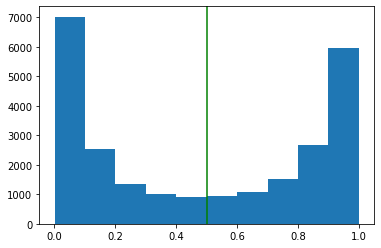

In [13]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='green')

In [14]:
'{}%'.format(roc_auc_score(y_valid, y_hat)*100.0)

'92.95568320000001%'